In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import xroms

%matplotlib inline

In [ ]:
ds = xr.open_dataset('/srv/data1/particleTrack_GLORYS/partTracking/ROMS_partTrack/prepareData/DATA_subDaily/ocean_his.nc')
ds, xgrid = xroms.roms_dataset(ds)
ds.xroms.set_grid(xgrid)
griDS = xr.open_dataset('/srv/data1/particleTrack_GLORYS/partTracking/ROMS_partTrack/prepareData/DATA_subDaily/romsGrid_WEP.nc')

In [ ]:
z= ds['z_rho']

In [31]:
pm = ds['pm']
pn = ds['pn']
dx = griDS['dx']
dy = griDS['dy']

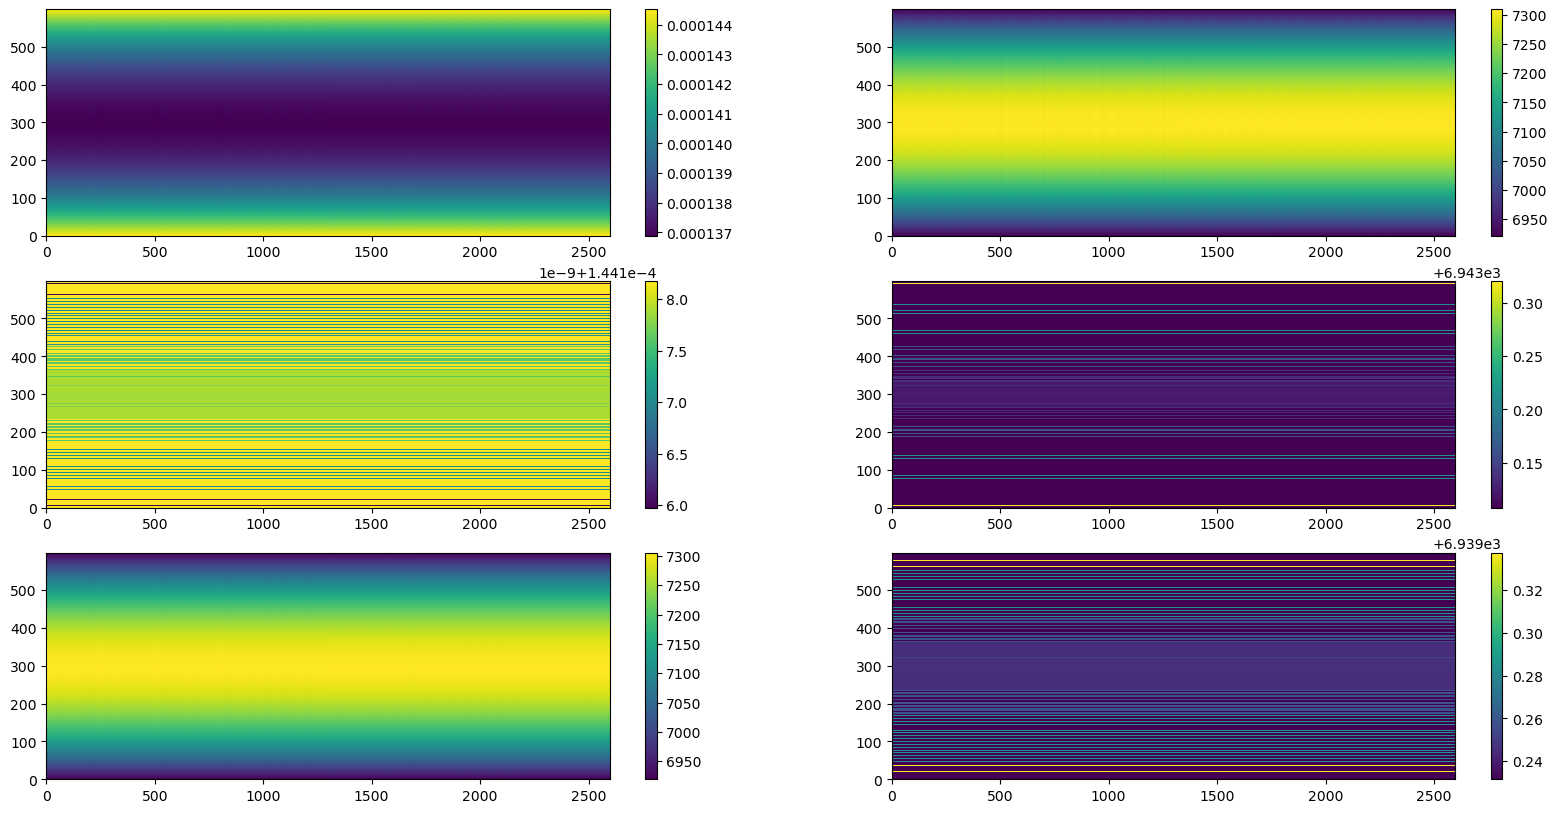

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20,10))
ax = axes[0,0]
m = ax.pcolormesh(pm)
plt.colorbar(m, ax = ax)

ax = axes[0,1]
m = ax.pcolormesh(dx)
plt.colorbar(m, ax = ax)

ax = axes[1,0]
m = ax.pcolormesh(pn)
plt.colorbar(m, ax = ax)

ax = axes[1,1]
m = ax.pcolormesh(dy)
plt.colorbar(m, ax = ax)


ax = axes[2,0]
m = ax.pcolormesh(1/pm)
plt.colorbar(m, ax = ax)

ax = axes[2,1]
m = ax.pcolormesh(1/pn)
plt.colorbar(m, ax = ax)


In [38]:
(pm * dx).max , (pm * dx).min

(<bound method DataArrayAggregations.max of <xarray.DataArray (eta_rho: 599, xi_rho: 2599)>
 array([[1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059],
        [1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059],
        [1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059],
        ...,
        [1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059],
        [1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059],
        [1.00055867, 1.00055867, 1.00032636, ..., 1.00055867, 1.00050059,
         1.00050059]])
 Coordinates:
     lon_rho  (eta_rho, xi_rho) float64 ...
     lat_rho  (eta_rho, xi_rho) float64 ...
   * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 591 592 593 594 595 596 597 598
   * xi_rho   (xi_rho) int64 0 1 2 3 4 5 6 ... 2592 2593 2594 2595 2596 2597 2598
 Attributes:
     long_name:  curvilinear coordinate

In [5]:
ds

<xarray.Dataset>
Dimensions:     (s_rho: 30, eta_rho: 599, xi_rho: 2599, ocean_time: 1,
                 lat_rho: 599, lon_rho: 2599)
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2018-05-21
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 ... 2593 2594 2595 2596 2597 2598
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 592 593 594 595 596 597 598
    z_rho       (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
Data variables: (12/29)
    uo          (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    vo          (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    so          (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    thetao      (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    zos         (ocean_time, eta_rho, xi_rho) float32 ...
    f           (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    ...          ...
    dx_vo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dy_vo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dz_vo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dx_wo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dy_wo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dz_wo       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...

In [15]:
lon = ds['lon_rho']
lat = ds['lat_rho']
s = ds['s_rho']
p = ds['pres'].to_numpy()
rho = ds['rho'].to_numpy()
z = ds['z_rho'].to_numpy()

In [13]:
p.shape, z.shape

((1, 30, 599, 2599), (1, 30, 599, 2599))

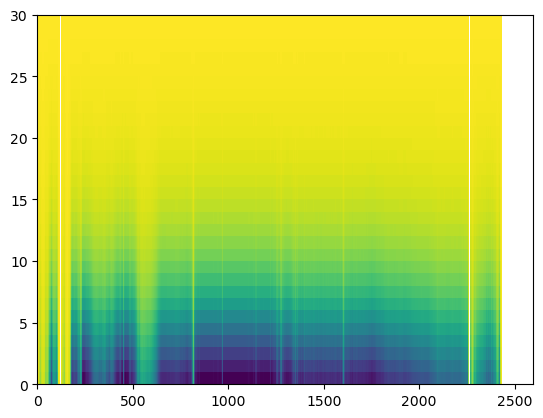

In [18]:
plt.pcolormesh(z[0,:,300,:])

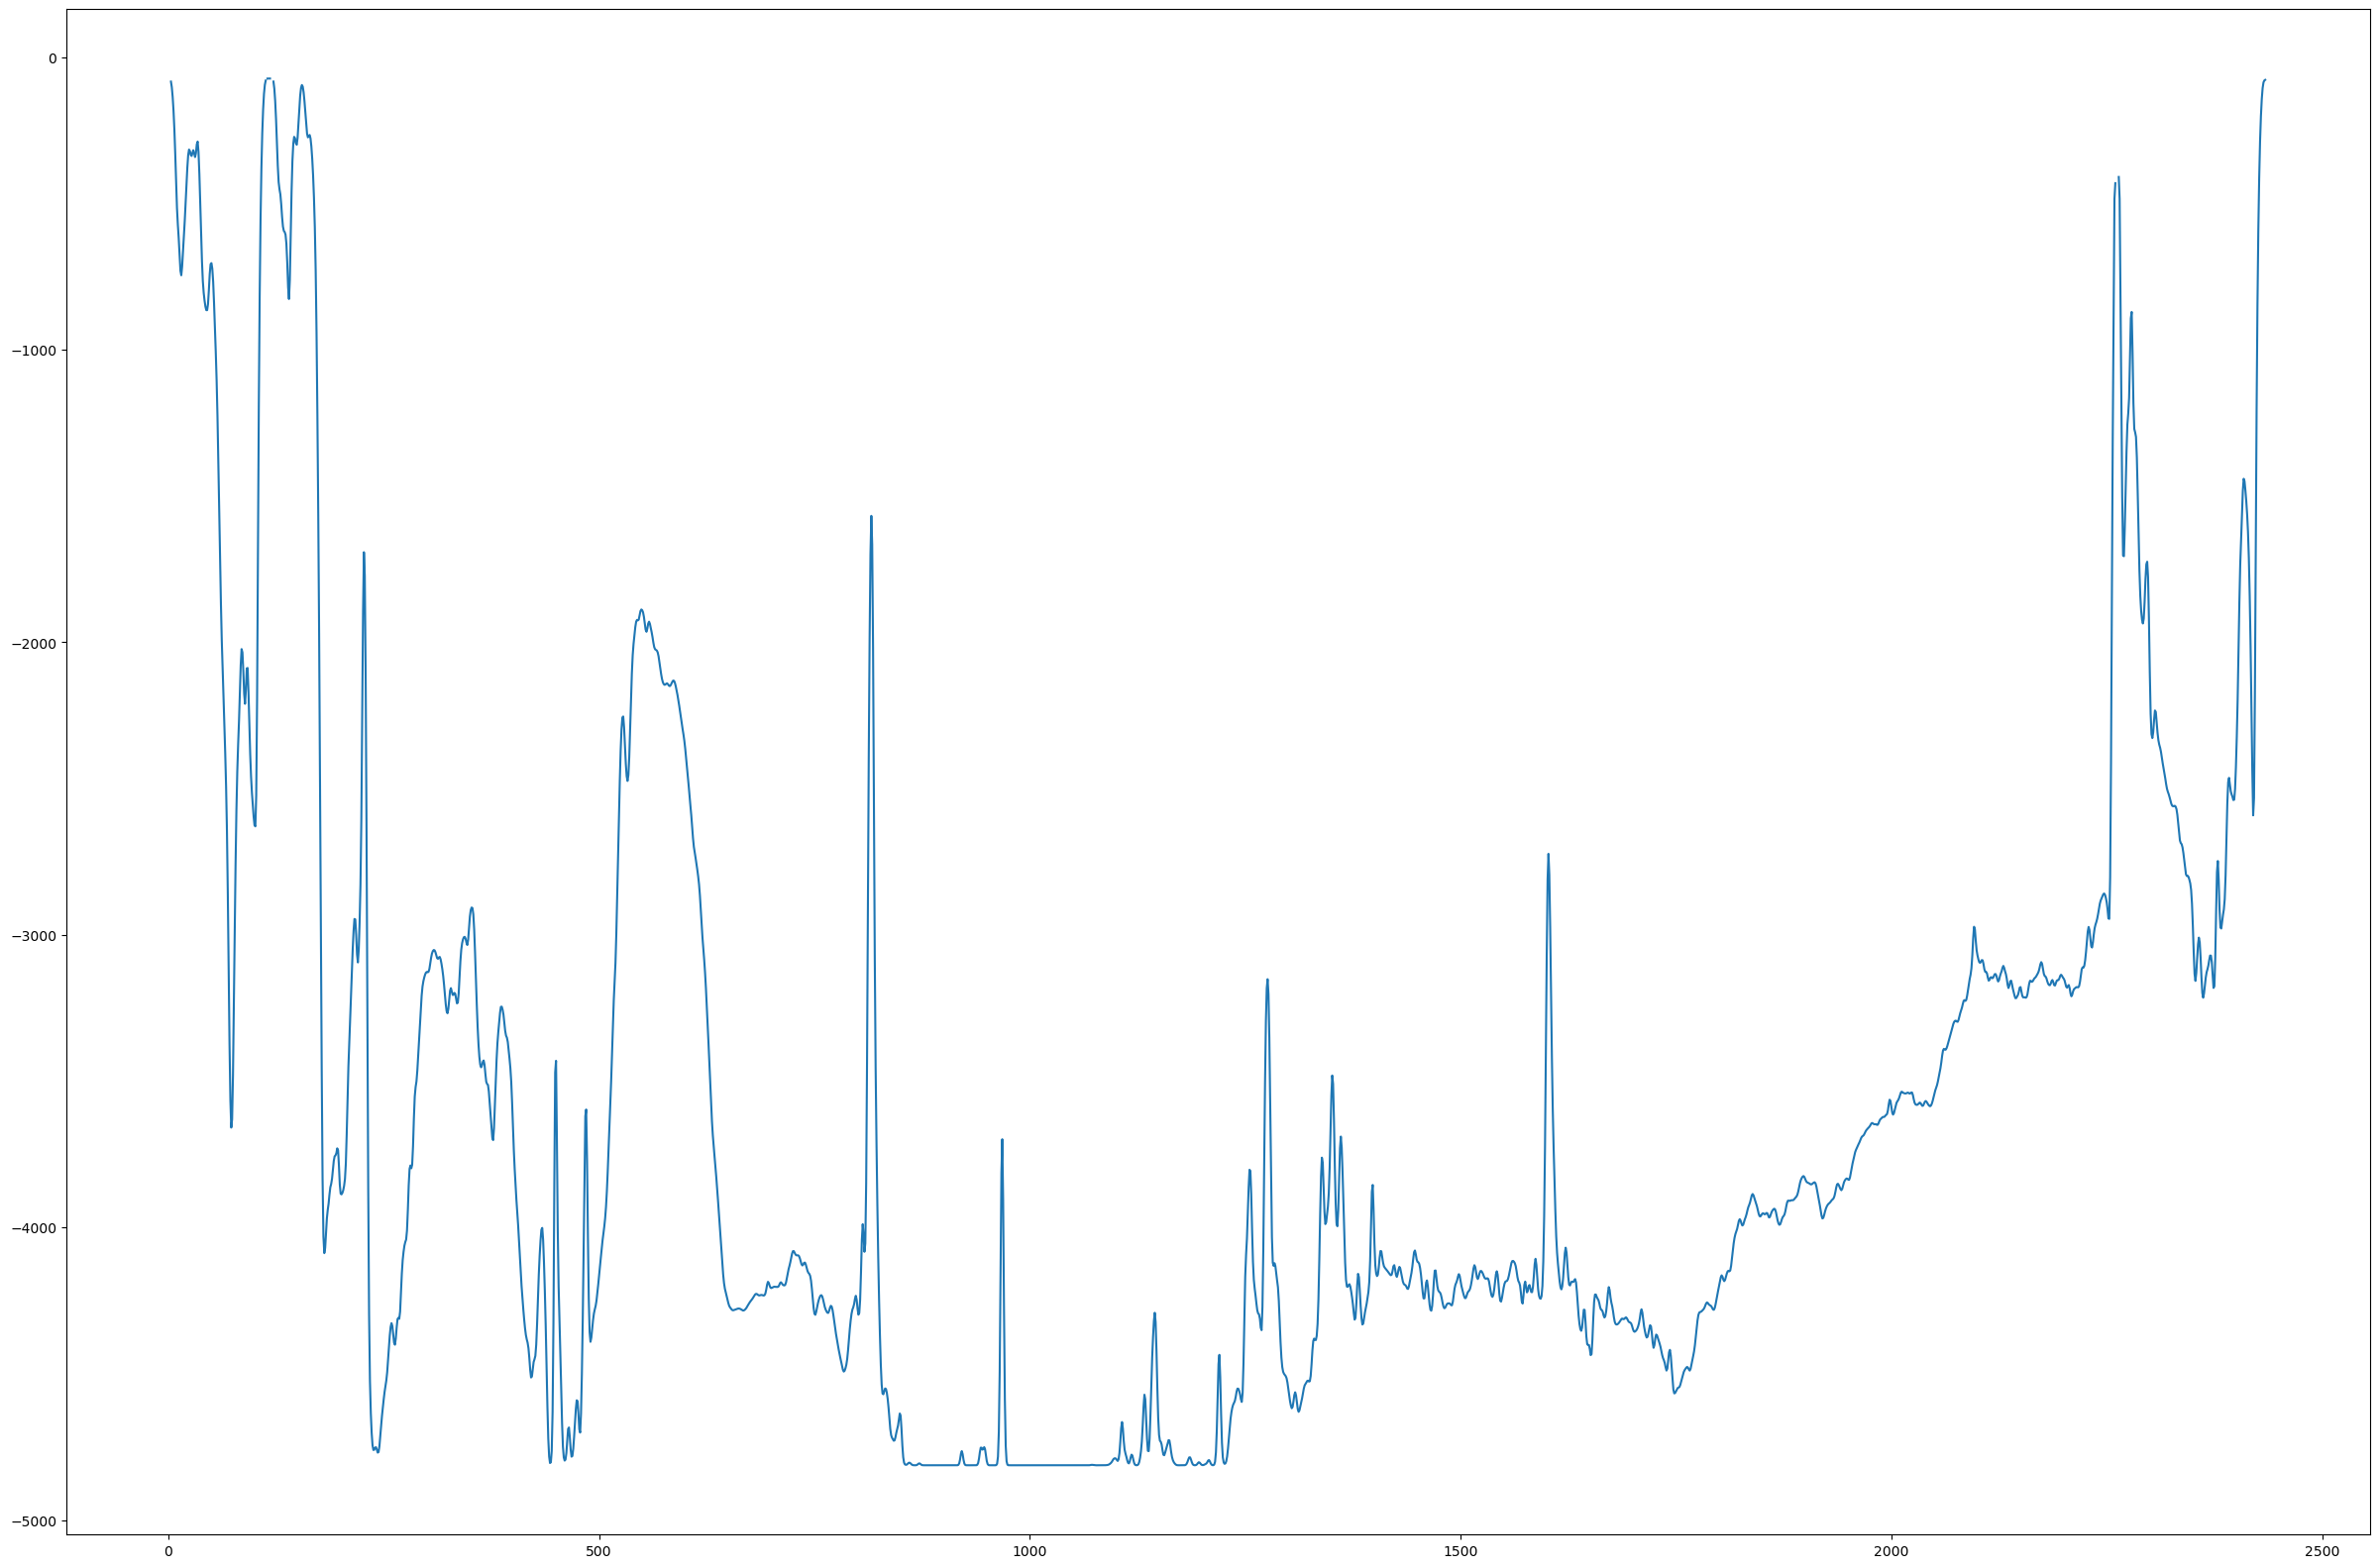

In [24]:
plt.figure(figsize=(30,20))
plt.plot(z[0,0,300,:].T)

In [8]:
from scipy import interpolate
xt = np.array([0,1], dtype=float)
yt = np.array([0,1], dtype=float)
z = np.array([[0,1],[1,3]])
f = interpolate.interp2d(xt, yt, z, kind='linear')

xnew = xx[0,:]
ynew = yy[:,0]
znew = f(xnew, ynew)

/tmp/ipykernel_967097/1342849370.py:5: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(xt, yt, z, kind='linear')
/tmp/ipykernel_967097/1342849370.py:9: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for reg

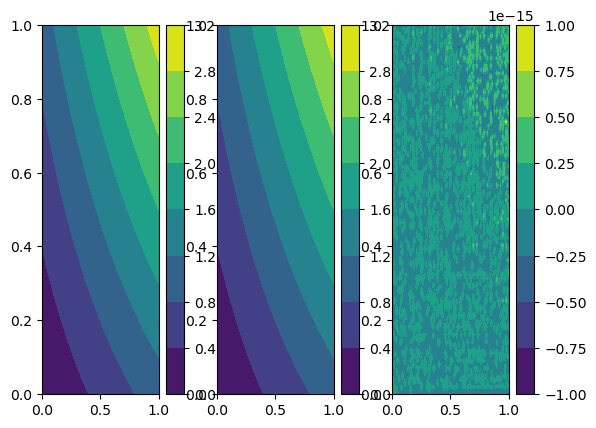

In [9]:
plt.subplot(1,3,1)
plt.contourf(x,y,Val)
plt.colorbar()

plt.subplot(1,3,2)
plt.contourf(x,y,znew)
plt.colorbar()

plt.subplot(1,3,3)
plt.contourf(x,y,Val-znew)
plt.colorbar()

In [10]:
a = 0
b = 1
(a+b)/3,(a+b)/2,(a+b)*2/3,

(0.3333333333333333, 0.5, 0.6666666666666666)

In [15]:
ds = Dataset('prepareData/DATA/GLORYS12v1_dailyAvg_2020-01-01_added.nc')

In [16]:
ds.variables.keys()

dict_keys(['mlotst', 'depth', 'latitude', 'vo', 'thetao', 'uo', 'time', 'bottomT', 'so', 'longitude', 'zos', 'wo', 'rho', 'pres', 'dx_pres', 'dy_pres'])

In [17]:
xds = xr.open_dataset('prepareData/glorysGrid_TEP.nc')
dx = xds['dx'].to_numpy()
dy = xds['dy'].to_numpy()
xds.close()

In [21]:
uo = np.array(ds.variables['uo'])
vo = np.array(ds.variables['vo'])
wo = np.array(ds.variables['wo'])
depth = np.array(ds.variables['depth'])
lat = np.array(ds.variables['latitude'])
lon = np.array(ds.variables['longitude'])
mask = np.logical_or(abs(vo)>100, abs(uo)>100)
vo[mask] = float('nan')
uo[mask] = float('nan')
wo[mask] = float('nan')

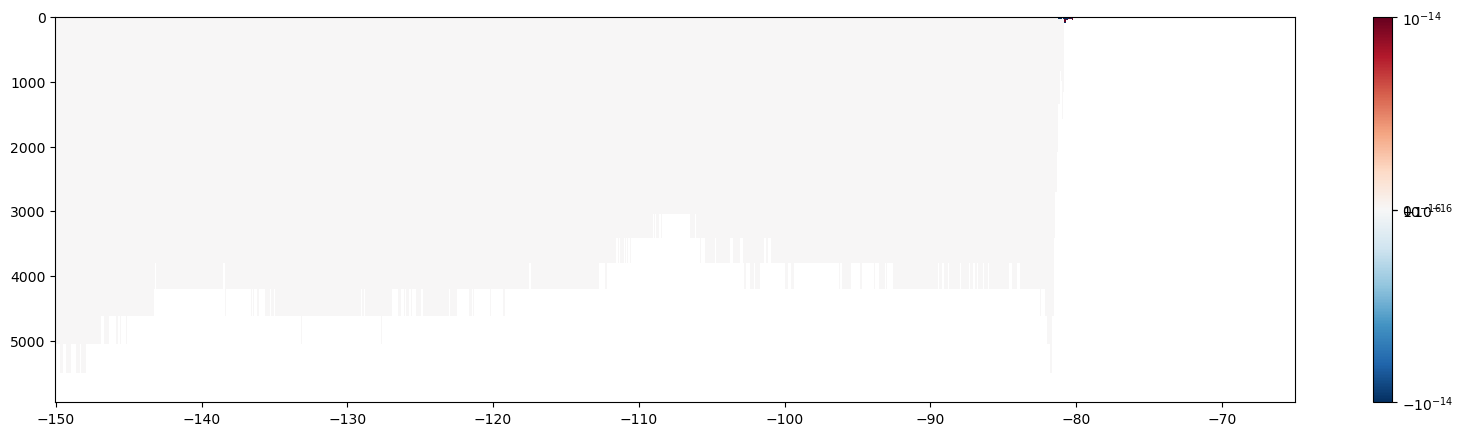

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

cmap = cm.seismic
plt.figure(figsize=(20,5))
plt.pcolormesh(lon, depth, wo[0,:,100,:], norm=colors.CenteredNorm(), cmap=cmap)
plt.pcolormesh(lon, depth, wo[0,:,100,:], norm=colors.SymLogNorm(linthresh=1e-15, linscale=1e-15,
                                              vmin=-1e-14, vmax=1e-14, base=10),
                       cmap='RdBu_r', shading='auto')
plt.gca().invert_yaxis()
plt.colorbar()

In [ ]:
vo[abs(vo)>100] = 0
plt.pcolormesh(vo[0,:,100,:])
plt.colorbar()
plt.gca().invert_yaxis()

In [ ]:
a =np.arange(10)

x = np.array([0,6,5,4,5,3,4,5,7,8,3,6,9,0])

In [ ]:
a[x]